## Installing Dependencies

In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [ ]:
!pip install stable-baselines3[extra] protobuf==3.20.*

  Using cached protobuf-3.20.3-cp38-cp38-win_amd64.whl (904 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Owner\\anaconda3\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
!pip install stable-baselines[mpi]

In [ ]:
!pip install mss pydirectinput
!pip install tesseract
!pip install pytesseract

In [ ]:
import os
from mss import mss                        #used for screen capture
import pydirectinput                       #sending commands
import cv2                                 #allows us to do frame processing
import numpy as np                         #transformational framework
import pytesseract                         #OCR to capture the "Game Over" reading
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
from matplotlib import pyplot as plt       #to visualize the frames
import time                                # to time the pauses
from gym import Env                        # environment components
from gym.spaces import Box, Discrete  

## Building the Environment

#### Creating the environment

In [ ]:
class WebGame(Env):
    # action and observation shapes
    def __init__(self):
        
        #model subclass
        super().__init__()
        
        #space setup
        self.observation_space = Box(low = 0, high = 255, shape = (1,83,100), dtype = np.uint8)
        self.action_space = Discrete(3)
        
        #extraction parameters
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 800, 'height': 800}
        self.done_location = {'top': 555, 'left': 830, 'width': 860, 'height': 70}
    
    #do something in the game like jump or duck
    def step(self, action):
        
        #0 = space
        #1 = down(duck)
        #2 = null(no action)
        
        action_map = {
            0: 'space',
            1: 'down',
            2: 'no_op'
        }
        if action != 2:
            pydirectinput.press(action_map[action])
          
        # check if the game is over
        done, done_cap = self.get_done()
        
        observation = self.get_observation()
        
        reward = 1
        info = {}
        
        return observation, reward, done, info
    
    #visualizing the game
    def render(self):
        cv2.imshow('Game', np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
    
    
    #game restart once the run is over
    def reset(self):
        time.sleep(1)
        pydirectinput.click(x = 150, y = 150)
        pydirectinput.press('space')
        return self.get_observation()
    
    
    
    #screen grab the part of the game for observation
    def get_observation(self):
        
        #screen capture
        raw = np.array(self.cap.grab(self.game_location))[:,:,:30].astype(np.uint8)
        
        #changing the screen capture to grayscale
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        
        #resizing it
        resized = cv2.resize(gray, (100, 83))
        
        #adding channels
        channel = np.reshape(resized, (1, 83, 100))
                
        return channel
    
    
    #check if the game is over
    def get_done(self):
        
        done_cap = np.array(self.cap.grab(self.done_location))
        
        # grab the first 4 letters
        done_strings = ['GAME', 'GAHE']
        
        done = False
       
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        
        return done_cap, done, res
    #ends the observation
    def close(self):
        cv2.destroyAllWindows()
        

In [ ]:
env = WebGame()

In [ ]:
env.action_space.sample()

1

In [ ]:
env.observation_space.sample()

array([[[ 67, 183,  84, ...,  54,  81, 150],
        [213, 123,  76, ..., 133, 174,  82],
        [103, 234,  30, ...,  93, 234, 240],
        ...,
        [ 35, 201,  16, ..., 248, 108, 149],
        [ 73,  69, 198, ...,  62,  87, 116],
        [ 58,  25, 100, ..., 162, 253, 150]]], dtype=uint8)

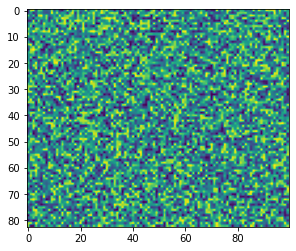

In [ ]:
plt.imshow(env.observation_space.sample()[0])

In [ ]:
env.get_observation()

array([[[33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        ...,
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33]]], dtype=uint8)

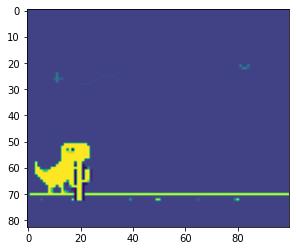

In [ ]:
plt.imshow(env.get_observation()[0])

In [ ]:
env.get_observation().shape

(1, 83, 100)

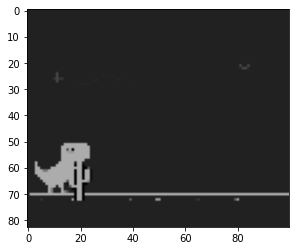

In [ ]:
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))

In [ ]:
env.get_done()

(array([[[ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         ...,
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255]],
 
        [[ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         ...,
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255]],
 
        [[ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         ...,
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255]],
 
        ...,
 
        [[ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         ...,
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255]],
 
        [[ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
         ...,
         [ 36,  33,  32, 255],
         [ 36,  33,  32, 255],
    

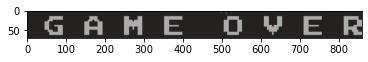

In [ ]:
plt.imshow(env.get_done())

In [ ]:
res, done, done_cap = env.get_done()

In [ ]:
done

True


In [ ]:
env.render()

In [ ]:
env.close()

In [ ]:
env.reset()

array([[[33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        ...,
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33]]], dtype=uint8)

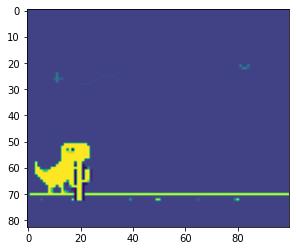

In [ ]:
env= WebGame()
obs = env.get_observation()
plt.imshow(obs[0])

In [ ]:
for episode in range(10):
    obs = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        total_reward += reward    

## Training the model

#### Creating the callback

In [ ]:
import os
from stable_baselines3 import DQN

#importing base callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

#checking the environment
from stable_baselines3.common import env_checker

In [ ]:
#checking to see if the environment is okay
env_checker.check_env(env)

In [ ]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [ ]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [ ]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

#### Building a DQN model and training

In [ ]:
#Importing DQN algorithm
from stable_baselines3 import DQN

In [ ]:
# Creating a DQN model with CNN policy
model = DQN('CnnPolicy', env, tensorboard_log = LOG_DIR, verbose = 1, buffer_size = 1000000, learning_starts = 10)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model.learn(total_timesteps = 10000, callback = callback)

## Testing the Model

In [ ]:
obs

array([[[33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        ...,
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33],
        [33, 33, 33, ..., 33, 33, 33]]], dtype=uint8)

In [ ]:
action, _ = model.predict(obs)

In [ ]:
action

array(1, dtype=int64)

In [ ]:
for episode in range(5): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(int(action))
        total_reward += reward
    print(f'Total Reward for episode {episode} is {total_reward}')

Total Reward for episode 0 is 12
Total Reward for episode 1 is 13
Total Reward for episode 2 is 11
Total Reward for episode 3 is 15
Total Reward for episode 4 is 12
Total Reward for episode 5 is 15
